## Downloaded from
https://dataviz.vam.wfp.org

continue to food_prices_senegal_all_summary.ipynb

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('dark_background')

In [2]:
data_folder = Path.cwd().parent.parent.joinpath('data', 'external')

In [3]:
file = next(Path(data_folder).glob('wfp_food_prices_senegal.csv'))

In [4]:
file

PosixPath('/home/cajanond/Documents/omdena/GPSDD-Food-Security-Senegal/data/external/wfp_food_prices_senegal.csv')

In [5]:
df = pd.read_csv(file,header=1)

In [6]:
df['#item+unit'].unique()

array(['KG'], dtype=object)

In [7]:
df['#currency'].unique()

array(['XOF'], dtype=object)

In [8]:
df = df[['#date', '#item+name', '#value', '#adm1+name', '#name+market']]

In [9]:
df


,#date,#item+name,#value,#adm1+name,#name+market
0,2007-01-15,Maize (local) - Retail,160.0,Kedougou,Kedougou
1,2007-03-15,Maize (local) - Retail,100.0,Kedougou,Kedougou
2,2007-04-15,Maize (local) - Retail,200.0,Kedougou,Kedougou
3,2007-05-15,Maize (local) - Retail,200.0,Kedougou,Kedougou
4,2007-07-15,Maize (local) - Retail,190.0,Kedougou,Kedougou
...,...,...,...,...,...
31801,2012-04-15,Maize (imported) - Retail,250.0,Saint louis,Galoya
31802,2012-03-15,Maize (local) - Retail,250.0,Saint louis,Rosso
31803,2012-03-15,Rice (imported) - Retail,300.0,Saint louis,Rosso
31804,2012-03-15,Sorghum - Retail,250.0,Saint louis,Rosso


In [10]:
df.columns = ['datetime', 'crop', 'value', 'region', 'market']

In [11]:
dates = df['datetime'].str.split('-', expand=True)


In [12]:
dates.columns = ['year', 'month', 'day']

In [13]:
df = pd.concat([dates, df], axis=1)


In [14]:
df['year'].unique()

array(['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006'], dtype=object)

In [15]:
df['crop'].unique()

array(['Maize (local) - Retail', 'Rice (imported) - Retail',
       'Sorghum - Retail', 'Rice (local) - Retail', 'Millet - Retail',
       'Groundnuts (unshelled) - Retail', 'Groundnuts (shelled) - Retail',
       'Beans (niebe) - Retail', 'Maize (imported) - Retail',
       'Rice (ordinary, first quality) - Retail',
       'Rice (ordinary, second quality) - Retail',
       'Sorghum (imported) - Retail'], dtype=object)

In [16]:
df_temp = df[df['crop'] == 'Rice (imported) - Retail']

In [17]:
xticks = df_temp['datetime'].unique()
xticks.sort()

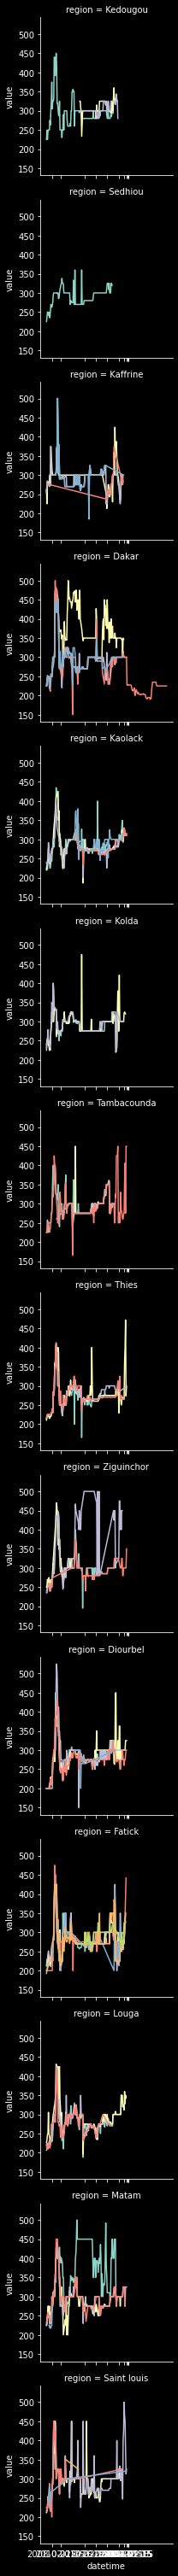

In [18]:
g = sns.FacetGrid(data = df_temp, col_wrap=1, col='region')
g.map(sns.lineplot, 'datetime', 'value', 'market')
g.set(xticks = xticks[::24])

In [19]:
# aggregate mean data per region
df['crop'].unique()

array(['Maize (local) - Retail', 'Rice (imported) - Retail',
       'Sorghum - Retail', 'Rice (local) - Retail', 'Millet - Retail',
       'Groundnuts (unshelled) - Retail', 'Groundnuts (shelled) - Retail',
       'Beans (niebe) - Retail', 'Maize (imported) - Retail',
       'Rice (ordinary, first quality) - Retail',
       'Rice (ordinary, second quality) - Retail',
       'Sorghum (imported) - Retail'], dtype=object)

In [20]:
df['crop2'] = df['crop'].apply(lambda x: x.split(' ')[0])

In [21]:
df['crop2'].unique()

array(['Maize', 'Rice', 'Sorghum', 'Millet', 'Groundnuts', 'Beans'],
      dtype=object)

In [22]:
df = df.groupby(['region', 'datetime', 'crop2']).mean()

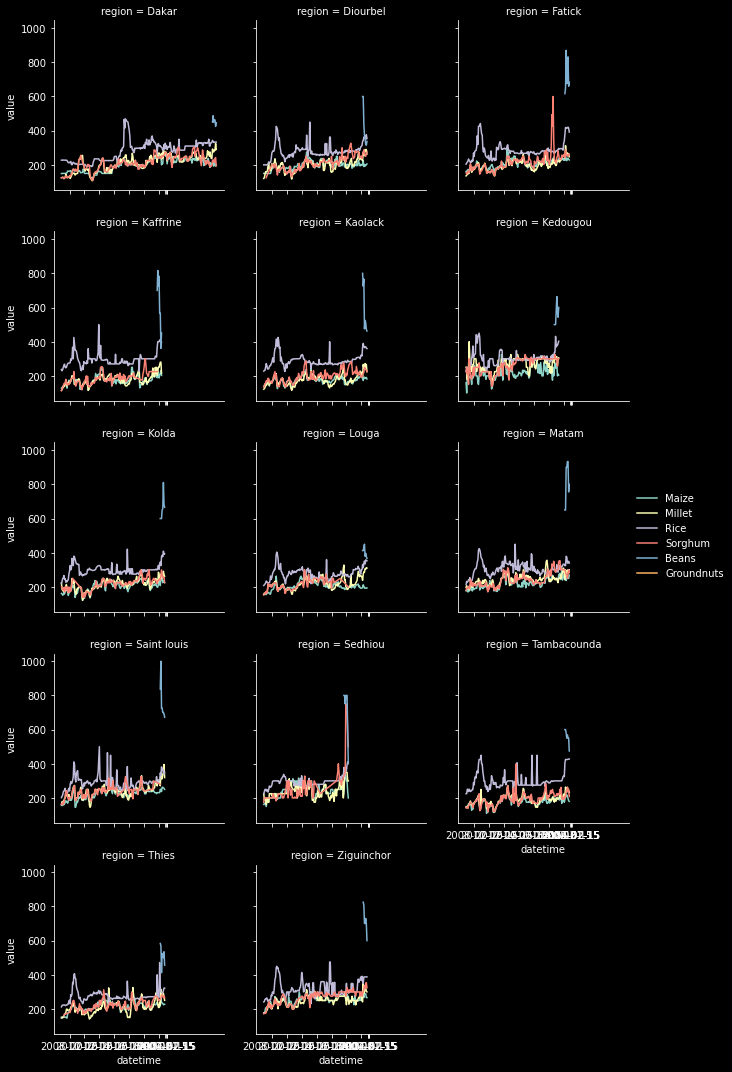

In [23]:
g = sns.FacetGrid(data = df.reset_index(), col_wrap=3, col='region')
g.map(sns.lineplot, 'datetime', 'value', 'crop2')
g.set(xticks = xticks[::24])
g.add_legend()

Drop beans


In [24]:
df.reset_index(inplace=True)


df = df[df['crop2'] != 'Beans']

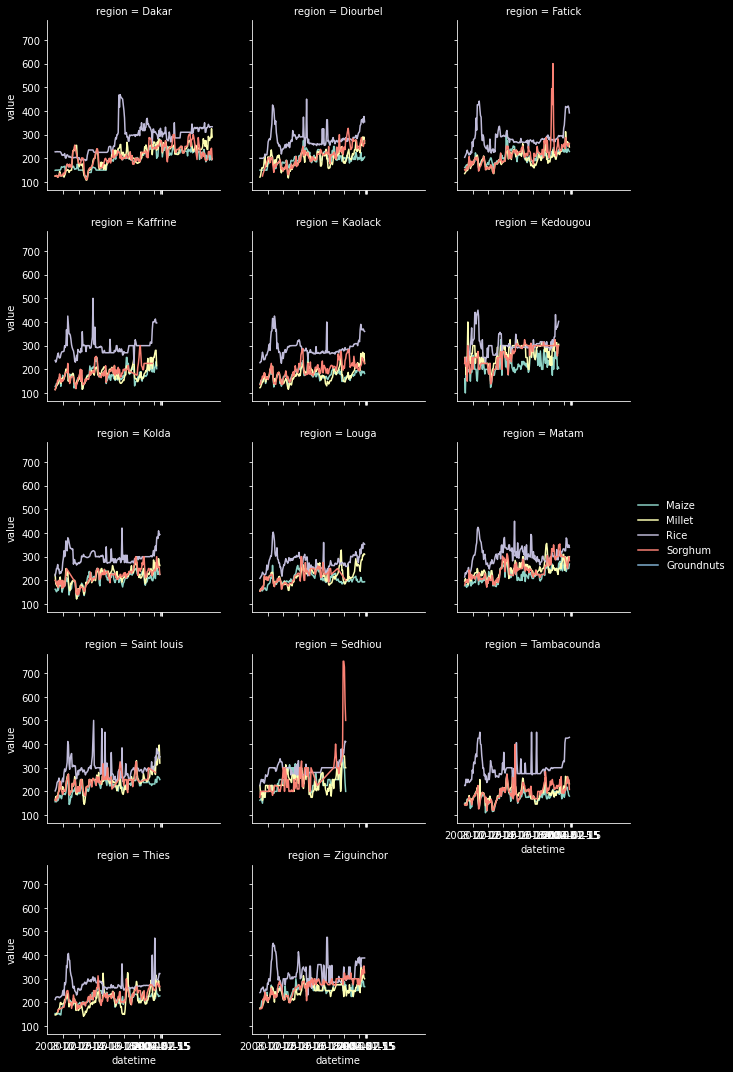

In [25]:
g = sns.FacetGrid(data = df.reset_index(), col_wrap=3, col='region')
g.map(sns.lineplot, 'datetime', 'value', 'crop2')
g.set(xticks = xticks[::24])
g.add_legend()

In [ ]:
df.head()

In [ ]:
df.columns = ['adm1_name', 'datetime', 'variable', 'value']

In [38]:
df.to_csv(Path(data_folder).joinpath('SEN_market_data_aggreg.csv'))

In [2]:
df['datetime']

NameError: name 'df' is not defined

In [1]:
df


NameError: name 'df' is not defined